<a href="https://colab.research.google.com/github/Aljes2310/GIS-tasks-in-Python/blob/main/superposicion_SAN_granja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install contextily shapely geopandas

In [ ]:
pip install eomaps

In [ ]:
import geopandas as gpd

# Read the shapefile, subir todos los archivos que conforman el shapefile al mismo directorio
gdf = gpd.read_file("SAN_OFICIAL_03_02_21.shp")

<Axes: >

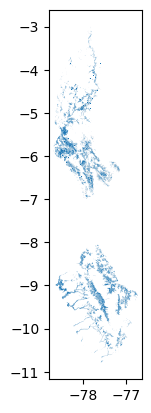

In [ ]:
gdf.plot()

In [ ]:
import pandas as pd

# Load the xlsx file
excel_data = pd.read_excel("Coordenada Santa Constanza.xlsx")
excel_data


In [ ]:
import utm
def rule(row):
    lat, long = utm.to_latlon(row["ESTE (X)"], row["NORTE (Y)"], 18, 'K')
    return pd.Series({"lat": lat, "long": long})
excel_data=excel_data.merge(excel_data.apply(rule, axis=1), left_index= True, right_index= True)



<Axes: >

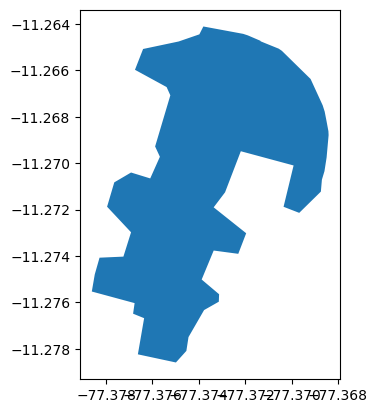

In [ ]:
from shapely import Polygon
x = excel_data['long'].tolist()
y = excel_data['lat'].tolist()

polygon1 = Polygon(list(zip(x, y)))
p = gpd.GeoSeries(polygon1)
p.plot()

In [ ]:
extent = (excel_data['lat'].min(), excel_data['lat'].max(), excel_data['long'].min(), excel_data['long'].max())
extent

xlim = ([extent[0]-0.3, extent[1]+1])
ylim = ([extent[2]-0.5, extent[3]+0.5])

In [ ]:
import contextily as cx
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [ ]:
red_patch = mpatches.Patch(color='green', label='Areas Agricolas Nacionales')
blue_patch = mpatches.Patch(color='red', label='Granja Santa Constanza')

Text(0.5, -0.07, '7 de Septiembre del 2023')

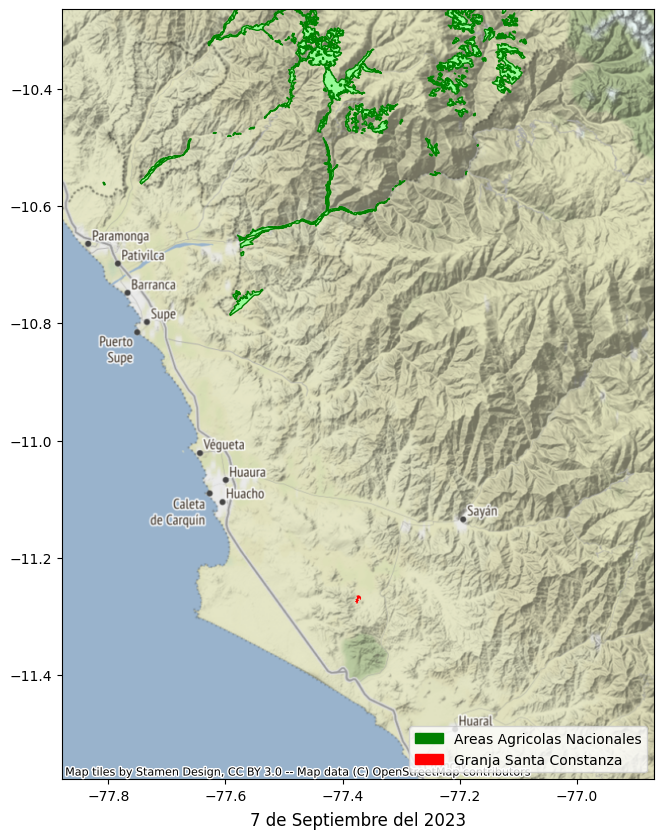

In [ ]:
ax = gdf.plot(color="palegreen", edgecolor="green", figsize=(10, 10))
ax.set_xlim(ylim)
ax.set_ylim(xlim)
p.plot(ax=ax, color="red")
cx.add_basemap(ax, crs=gdf.crs)
plt.legend(handles=[red_patch, blue_patch], loc='lower right')
plt.title('7 de Septiembre del 2023', y=-0.07)